**Арцишевский Антон, дз 2.2**

На всякий импортирую сразу несколько модулей, да побольше

In [1]:
%load_ext pycodestyle_magic
%flake8_on
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import pandas as pd

Заново прочитаю книгу и отчищу от пунктуации

In [2]:
from string import punctuation
with open('foundations_Asimov.txt', encoding='utf-8') as text:
    text = text.read()
for i in punctuation:
    text = text.replace(i, '')
text = text.replace('\n', ' ')

Токенизирую текст, создаю словарь с данными для датафрейма, записываю это в json файл (прост так) и создаю датафрейм

In [3]:
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
morph = MorphAnalyzer()
gram_razbor = []
for word in words:
    morph_asimov = morph.parse(word)
    wordform = morph_asimov[0].word
    lexemma = morph_asimov[0].normal_form
    case = morph_asimov[0].tag.case
    pos = morph_asimov[0].tag.POS
    gender = morph_asimov[0].tag.gender
    number = morph_asimov[0].tag.number
    simple_list = [{'СЛОВО': wordform, 'ЛЕКСЕМА': lexemma,
                    'ЧАСТЬ РЕЧИ': pos, 'ПАДЕЖ': case,
                    'РОД': gender, 'ЧИСЛО': number}]
    gram_razbor.extend(simple_list)
with open('pymorphy_Asimov1.json', 'w', encoding='utf-8') as f:
    json_pymorpy_Asimov = json.dump(gram_razbor, f, ensure_ascii=False)
df = pd.DataFrame(gram_razbor)

Сохраню данные в файл формата csv

In [4]:
df.to_csv('dataframe.csv', sep='\t', index=False)

### Задание 1
Я распечатал датафрейм и добавил помимо значений падежа другие показатели. В задании не требуется распечатать всё.

In [5]:
asimov = pd.read_csv('dataframe.csv', sep='\t').fillna('')
asimov.head(10)

,СЛОВО,ЛЕКСЕМА,ЧАСТЬ РЕЧИ,ПАДЕЖ,РОД,ЧИСЛО
0,азимов,азим,NOUN,gent,masc,plur
1,прелюдия,прелюдия,NOUN,nomn,femn,sing
2,к,к,PREP,,,
3,клеон,клеон,NOUN,nomn,masc,sing
4,i,i,,,,
5,последний,последний,ADJF,nomn,masc,sing
6,галактический,галактический,ADJF,nomn,masc,sing
7,император,император,NOUN,nomn,masc,sing
8,из,из,PREP,,,
9,династии,династия,NOUN,gent,femn,sing


### Задание 2
Сделаю барплот

Text(0, 0.5, 'Кол-во вхождений')

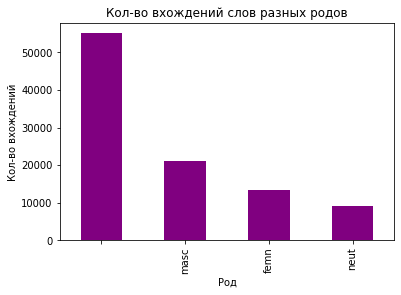

In [6]:
asimov['РОД'].value_counts().plot.bar(color='purple')
plt.title('Кол-во вхождений слов разных родов')
plt.xlabel('Род')
plt.ylabel('Кол-во вхождений')

Сделаю кружочег

Text(0.5, 1.0, 'Распределение рода')

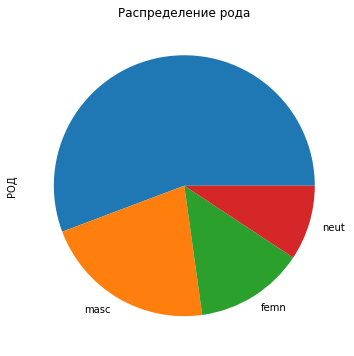

In [7]:
plt.figure(figsize=(6, 6))
asimov['РОД'].value_counts().plot(kind='pie')
plt.title('Распределение рода')

Сделаю ещё один красивенький барплот

Text(0, 0.5, 'Кол-во вхождений')

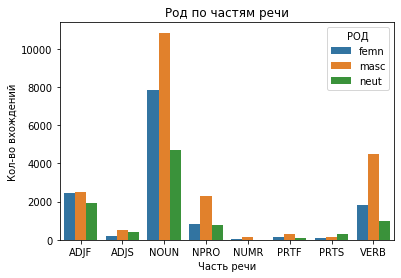

In [8]:
df2 = asimov[
    (asimov['РОД'] != '') & (asimov['РОД'] != 'мж')
][
    ['ЧАСТЬ РЕЧИ', 'РОД', 'ЧИСЛО']
].groupby(['ЧАСТЬ РЕЧИ', 'РОД'], as_index=False).count()

df2.columns = ['ЧАСТЬ РЕЧИ', 'РОД', 'total']
sns.barplot(x="ЧАСТЬ РЕЧИ", y="total", hue='РОД', data=df2)
plt.title('Род по частям речи')
plt.xlabel('Часть речи')
plt.ylabel('Кол-во вхождений')

### Задание 3
Сделаю боксплот, показывающий длину лемм различных частей речи

In [9]:
df2 = asimov[['ЛЕКСЕМА', 'ЧАСТЬ РЕЧИ', 'РОД']].groupby(
    ['ЛЕКСЕМА', 'ЧАСТЬ РЕЧИ'], as_index=False).count()
df2.columns = ['ЛЕКСЕМА', 'ЧАСТЬ РЕЧИ', 'total']
df2 = df2[df2['total'] > 10]

Text(0.5, 0, 'Часть речи')

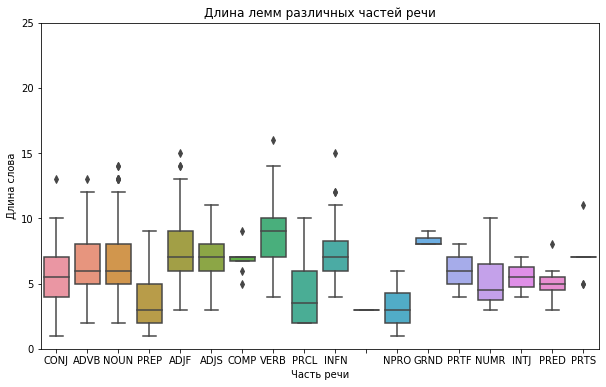

In [10]:
df2['ДЛИНА'] = df2['ЛЕКСЕМА'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x="ЧАСТЬ РЕЧИ", y="ДЛИНА", data=df2)
plt.ylim((0, 25))
plt.title('Длина лемм различных частей речи')
plt.ylabel('Длина слова')
plt.xlabel('Часть речи')

Сделаю барплот, показывающий распределение числа у различных родов

Text(0, 0.5, 'Число вхождений')

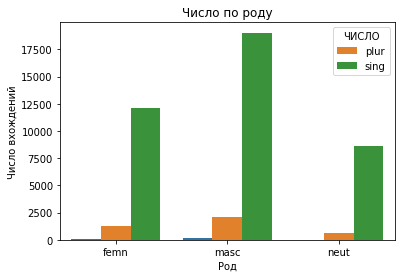

In [11]:
df2 = asimov[
    (asimov['РОД'] != '') & (asimov['РОД'] != 'мж')
][
    ['ЧАСТЬ РЕЧИ', 'РОД', 'ЧИСЛО']
].groupby(['РОД', 'ЧИСЛО'], as_index=False).count()

df2.columns = ['РОД', 'ЧИСЛО', 'total']
sns.barplot(x="РОД", y="total", hue='ЧИСЛО', data=df2)
plt.title('Число по роду')
plt.xlabel('Род')
plt.ylabel('Число вхождений')

### Задание 4

In [12]:
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(text)

4 способа делания одного и того же

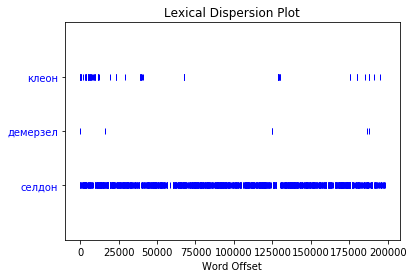

In [13]:
from nltk.probability import FreqDist
from matplotlib import pylab
import nltk.compat

words = ['клеон', 'демерзел', 'селдон']
text = lemmas
words.reverse()

points = [(x, y)
          for x in range(len(text))
          for y in range(len(words))
          if text[x] == words[y]]

if points:
    x, y = zip(*points)

else:
    x = y = ()

plt.plot(x, y, "b|", scalex=0.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()

c:\users\trekc\appdata\local\programs\python\python37-32\lib\site-packages\nltk\draw\__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


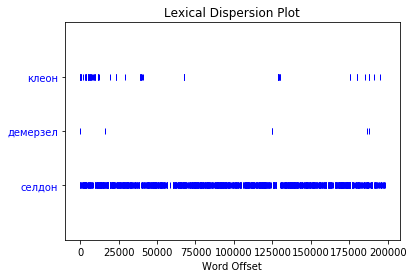

In [14]:
text = lemmas
words = ['клеон', 'демерзел', 'селдон']
# text.dispersion_plot(words)
nltk.draw.dispersion_plot(text, words)

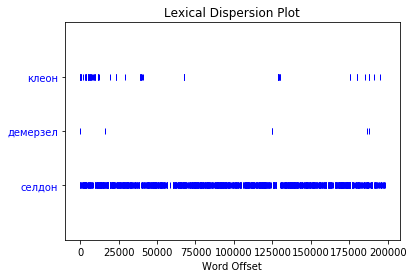

In [17]:
import nltk.book
text = lemmas
words = ['клеон', 'демерзел', 'селдон']
nltk.draw.dispersion_plot(text, words)

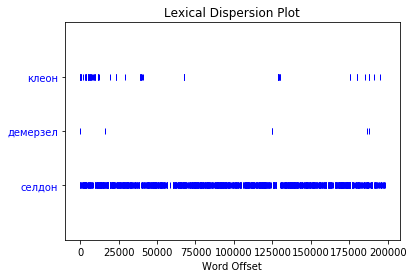

In [23]:
text = nltk.Text(lemmas)
words = ['клеон', 'демерзел', 'селдон']
nltk.draw.dispersion_plot(text, words)